### Bibliotecas

Para instalação das bibliotecas 

In [ ]:
#pip install pandas
#pip install seaborn
#pip install matplotlib
#pip install scikit-learn

Adicionando as bibliotecas que serão utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### DataFrames

In [2]:
df_spotify_youtube = pd.read_csv("../Projeto_ICD-Analise_de_Dados_do_Spotify_e_Youtube/Spotify_Youtube.csv")

Definindo o DataFrame "df_spotify_youtube_num" exclusivamente com dados numéricos e/ou não categóricos

In [3]:
numeric_columns = ['Danceability','Energy','Key','Loudness','Speechiness', 'Acousticness', 'Instrumentalness','Liveness','Valence','Tempo','Duration_ms', 'Views', 'Likes', 'Comments','Stream']
df_spotify_youtube_num = df_spotify_youtube[numeric_columns]
df_spotify_youtube_num

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,6.873961e+06


Definindo o DataFrame "df_spotify_youtube_ctg" exclusivamente com dados categóricos e/ou booleanos

In [8]:
not_numeric_columns = ['Artist', 'Url_spotify','Track','Album','Album_type','Uri','Url_youtube','Title','Channel', 'Description','Licensed','official_video']
df_spotify_youtube_ctg = df_spotify_youtube[not_numeric_columns]
df_spotify_youtube_ctg

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,The official video for Gorillaz - Rhinestone E...,True,True
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,The official music video for Gorillaz - Clint ...,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\r\n\r\nJUST D...,True,True
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\r\n\r\nSET FI...,True,True
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,Provided to YouTube by Routenote\r\n\r\nOUTSID...,True,True
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\r\n\r\nONLY G...,True,True


### Medidas de Centralidade e Dispersão - Dados Numéricos

Aplicando as medidas de centralidade e dispersão ao DataFrame "df_spotify_youtube_num" e suas respectivas colunas

#### Média

In [9]:
df_spotify_youtube_num.mean()

Danceability        6.197775e-01
Energy              6.352503e-01
Key                 5.300348e+00
Loudness           -7.671680e+00
Speechiness         9.645601e-02
Acousticness        2.915353e-01
Instrumentalness    5.596156e-02
Liveness            1.935210e-01
Valence             5.298533e-01
Tempo               1.206383e+02
Duration_ms         2.247176e+05
Views               9.393782e+07
Likes               6.633411e+05
Comments            2.751899e+04
Stream              1.359422e+08
dtype: float64

#### Mediana

In [10]:
df_spotify_youtube_num.median()

Danceability        6.370000e-01
Energy              6.660000e-01
Key                 5.000000e+00
Loudness           -6.536000e+00
Speechiness         5.050000e-02
Acousticness        1.930000e-01
Instrumentalness    2.405000e-06
Liveness            1.250000e-01
Valence             5.370000e-01
Tempo               1.199650e+02
Duration_ms         2.132845e+05
Views               1.450110e+07
Likes               1.244810e+05
Comments            3.277000e+03
Stream              4.968298e+07
dtype: float64

#### Moda

In [4]:
df_spotify_youtube_num.mode()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.687,0.572,0.0,-7.818,0.0324,0.114,0.0,0.11,0.961,77.986,237467.0,6.639000e+03,0.0,0.0,169769959.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.191200e+04,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333960e+05,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.020790e+06,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.877674e+06,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.266725e+06,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.309968e+07,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.588325e+07,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.623863e+07,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.870131e+07,NaN,NaN,NaN


#### Variância

In [12]:
df_spotify_youtube_num.var()

Danceability        2.731496e-02
Energy              4.585886e-02
Key                 1.279098e+01
Loudness            2.146236e+01
Speechiness         1.253505e-02
Acousticness        8.196701e-02
Instrumentalness    3.735021e-02
Liveness            2.840266e-02
Valence             6.024119e-02
Tempo               8.749183e+02
Duration_ms         1.557268e+10
Views               7.542950e+16
Likes               3.201681e+12
Comments            3.733965e+10
Stream              5.960047e+16
dtype: float64

#### Desvio Padrão

In [13]:
df_spotify_youtube_num.std()

Danceability        1.652724e-01
Energy              2.141468e-01
Key                 3.576449e+00
Loudness            4.632749e+00
Speechiness         1.119600e-01
Acousticness        2.862988e-01
Instrumentalness    1.932620e-01
Liveness            1.685309e-01
Valence             2.454408e-01
Tempo               2.957902e+01
Duration_ms         1.247905e+05
Views               2.746443e+08
Likes               1.789324e+06
Comments            1.932347e+05
Stream              2.441321e+08
dtype: float64

### Medidas de Centralidade e Dispersão - Dados Categóricos

Aplicando as medidas de centralidade e dispersão ao DataFrame "df_spotify_youtube_ctg" e suas respectivas colunas

#### Moda

In [14]:
df_spotify_youtube_ctg.mode()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Url_youtube,Title,Channel,Description,Licensed,official_video
0,$NOT,https://open.spotify.com/artist/003f4bk13c6Q3g...,El Ultimo Adiós - Varios Artistas Version,Greatest Hits,album,spotify:track:0tzixmHNQfE6S6SirSToxW,https://www.youtube.com/watch?v=GqOvxbFLwjY,Color Esperanza 2020 - Various Artists (Offici...,T-Series,,True,True
1,$uicideboy$,https://open.spotify.com/artist/00FQb4jTyendYW...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(G)I-DLE,https://open.spotify.com/artist/00XhexlJEXQstH...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,*NSYNC,https://open.spotify.com/artist/00me4Ke1LsvMxt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,070 Shake,https://open.spotify.com/artist/00sCATpEvwH48a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,will.i.am,https://open.spotify.com/artist/7y97mc3bZRFXzT...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2045,Ángela Aguilar,https://open.spotify.com/artist/7yQrcdkLdBAkV7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2046,Ñejo,https://open.spotify.com/artist/7ygNQCdpQWW7iS...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2047,Ñengo Flow,https://open.spotify.com/artist/7z5WFjZAIYejWy...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Boxplot

Construindo gráficos boxplot com os valores pertencentes às colunas do DataFrame "df_spotify_youtube_num"

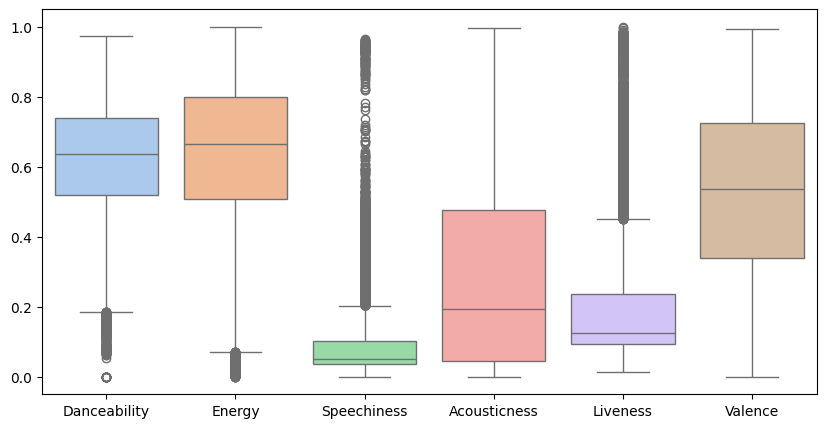

In [15]:
plt.figure(figsize=(10, 5))
sns.set_palette('pastel')
sns.boxplot(data= df_spotify_youtube_num[['Danceability','Energy','Speechiness','Acousticness','Liveness','Valence']])
plt.show()

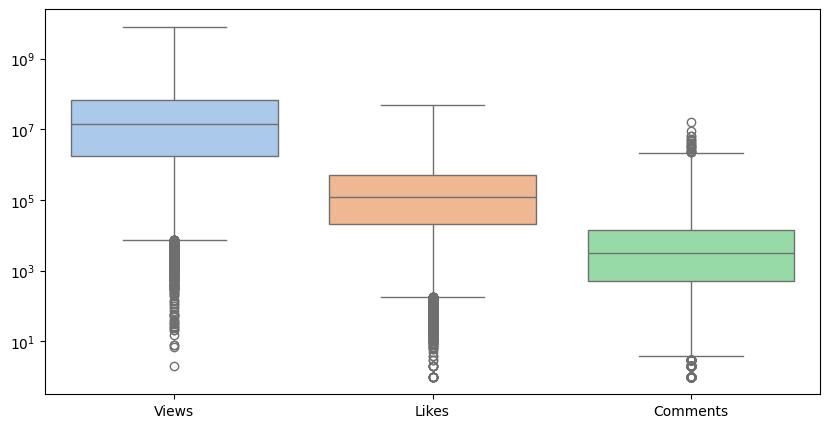

In [16]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(data= df_spotify_youtube_num[['Views','Likes','Comments']])
plt.show()

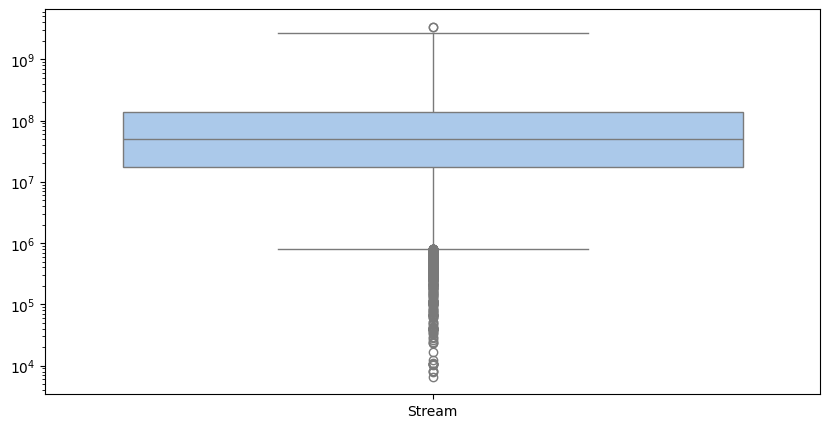

In [17]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(data= df_spotify_youtube_num[['Stream']])
plt.show()

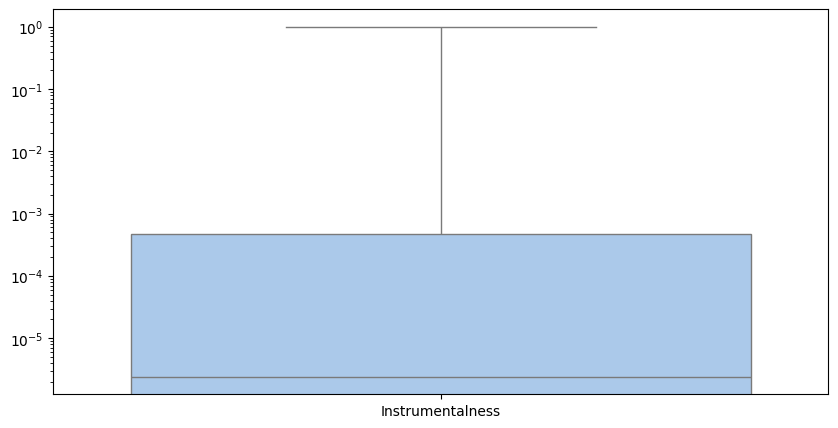

In [18]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(data= df_spotify_youtube_num[['Instrumentalness']])
plt.show()

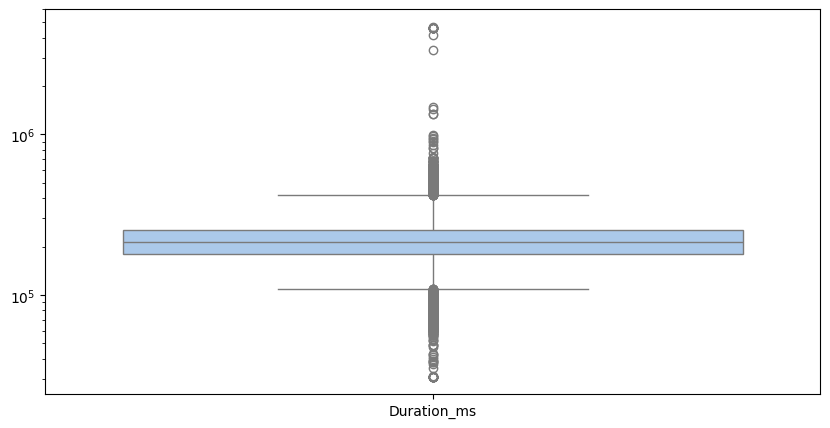

In [19]:
plt.figure(figsize=(10, 5))
plt.yscale('log')
sns.boxplot(data= df_spotify_youtube_num[['Duration_ms']])
plt.show()

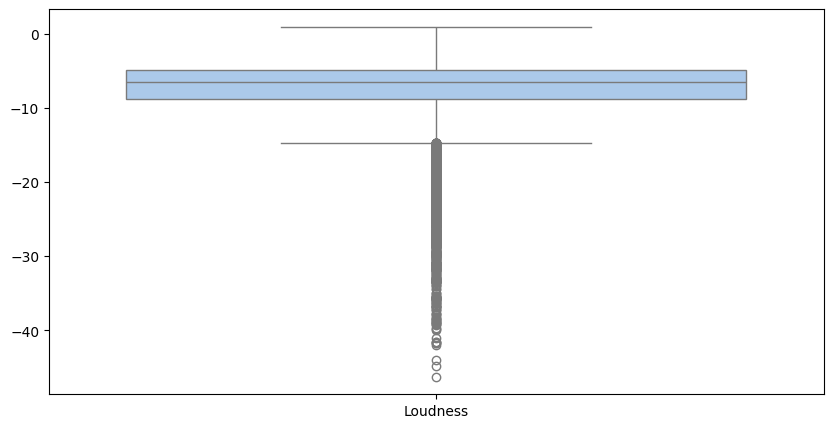

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_spotify_youtube_num[['Loudness']])
plt.show()

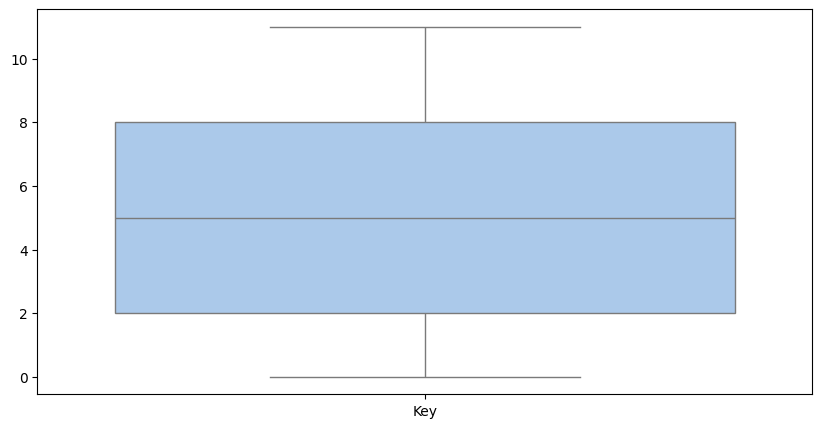

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_spotify_youtube_num[['Key']])
plt.show()

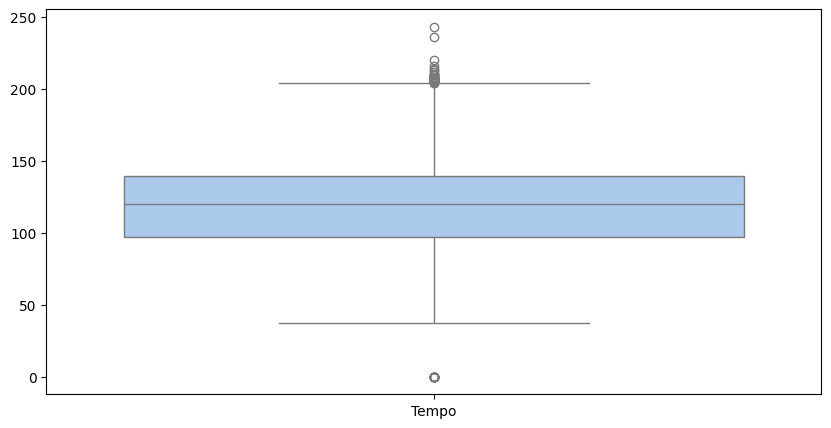

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data= df_spotify_youtube_num[['Tempo']])
plt.show()

### Histograma 

Construindo gráficos de frequência com os valores pertencentes às colunas do DataFrame "df_spotify_youtube_num"

#### Danceability, Energy e Speechiness

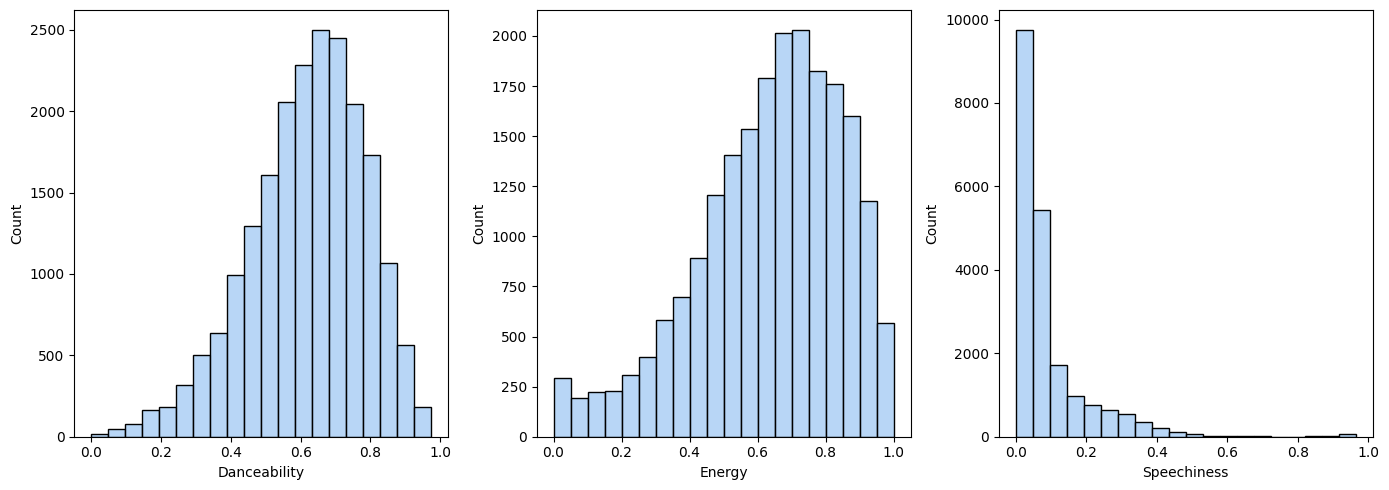

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(data=df_spotify_youtube_num,x="Danceability",bins=20)
plt.subplot(1,3,2)
sns.histplot(data=df_spotify_youtube_num,x="Energy",bins=20)
plt.subplot(1,3,3)
sns.histplot(data=df_spotify_youtube_num,x="Speechiness",bins=20)
plt.tight_layout()

#### Acousticness, Liveness e Valence

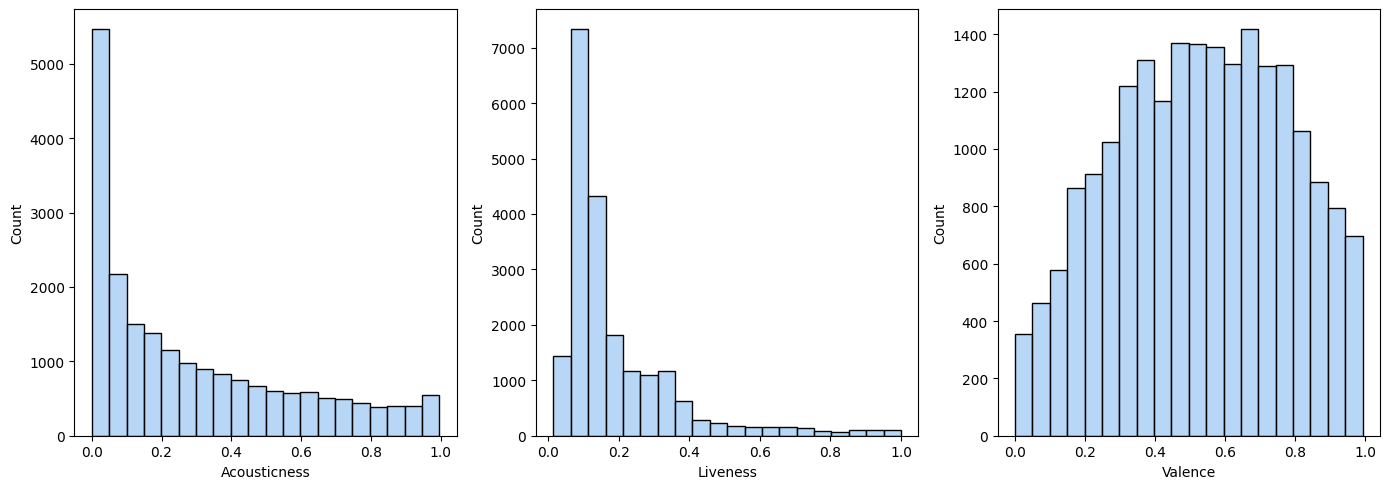

In [24]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.histplot(data=df_spotify_youtube_num,x="Acousticness",bins=20)
plt.subplot(1,3,2)
sns.histplot(data=df_spotify_youtube_num,x="Liveness",bins=20)
plt.subplot(1,3,3)
sns.histplot(data=df_spotify_youtube_num,x="Valence",bins=20)
plt.tight_layout()

### Gráfico de Barras

Construindo gráficos de barras com os valores pertencentes às colunas do DataFrame "df_spotify_youtube"

#### Album_type e Stream

[Text(0.5, 0, 'Album_type'), Text(0, 0.5, 'Stream')]

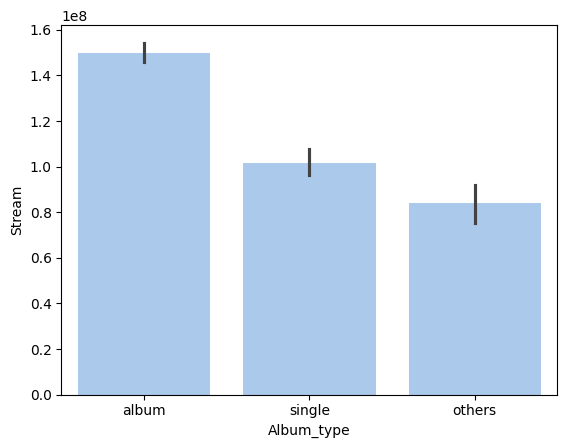

In [25]:
df_spotify_youtube['Album_type'] = df_spotify_youtube['Album_type'].replace('compilation', 'others')
a=sns.barplot(data=df_spotify_youtube,x="Album_type",y="Stream")
a.set(xlabel='Album_type',ylabel='Stream')

#### Youtube_related_columns e Views

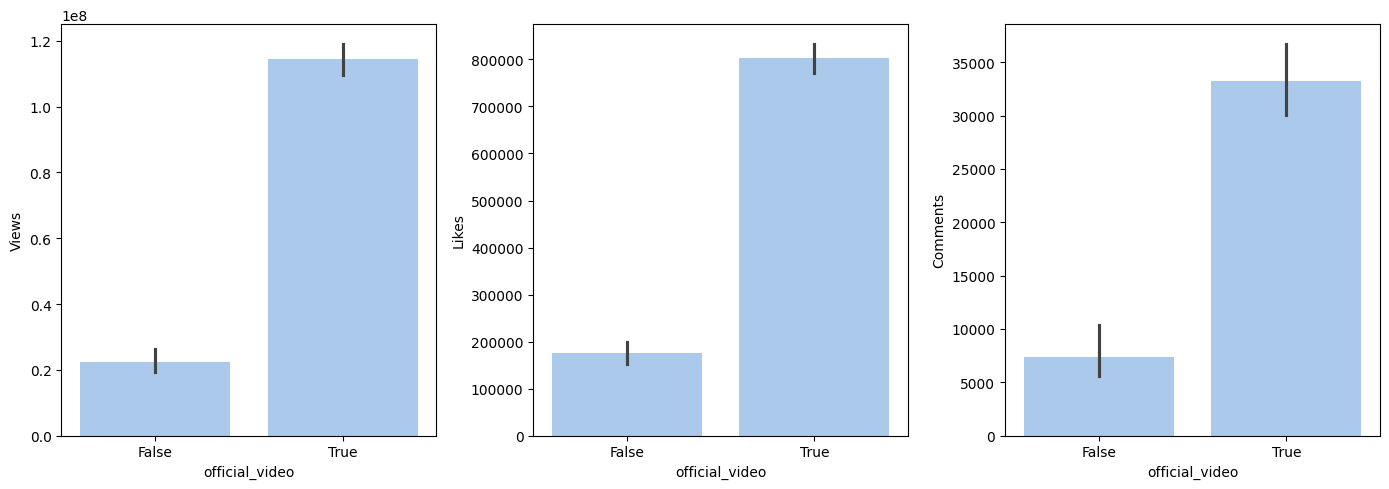

In [26]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.barplot(data=df_spotify_youtube,x="official_video",y="Views")
plt.subplot(1,3,2)
sns.barplot(data=df_spotify_youtube,x="official_video",y="Likes")
plt.subplot(1,3,3)
sns.barplot(data=df_spotify_youtube,x="official_video",y="Comments")
plt.tight_layout()

### Gráfico de Dispersão

Construindo gráficos de dispersão com os valores pertencentes às colunas do DataFrame "df_spotify_youtube_num"

#### Views, Likes e Comments

<Axes: xlabel='Views', ylabel='Likes'>

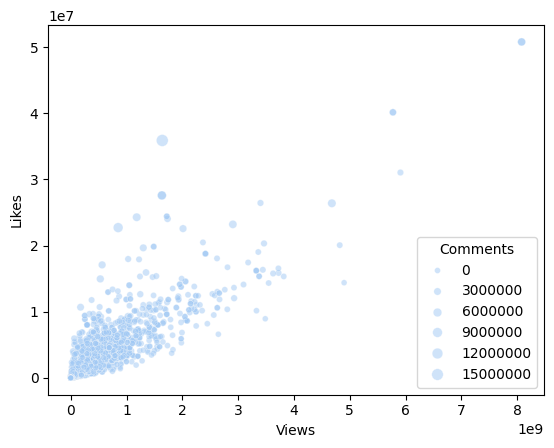

In [27]:
sns.scatterplot(data=df_spotify_youtube_num,x='Views',y='Likes',size='Comments',alpha=0.5)

#### Loudness e Energy | Acousticness e Energy

<Axes: xlabel='Acousticness', ylabel='Energy'>

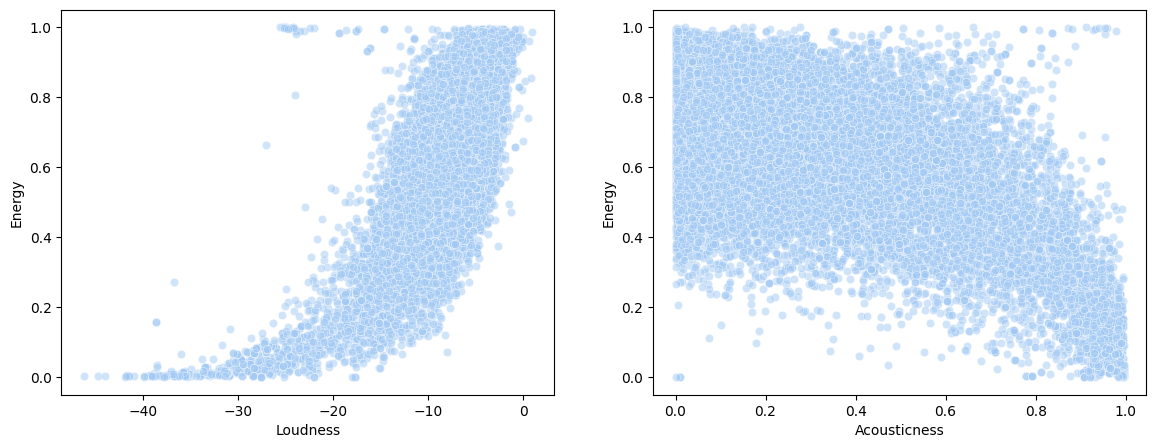

In [28]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_spotify_youtube_num,x='Loudness',y='Energy',alpha=0.5)
plt.subplot(1,2,2)
sns.scatterplot(data=df_spotify_youtube_num,x='Acousticness',y='Energy',alpha=0.5)

#### Danceability e Tempo

<Axes: xlabel='Danceability', ylabel='Tempo'>

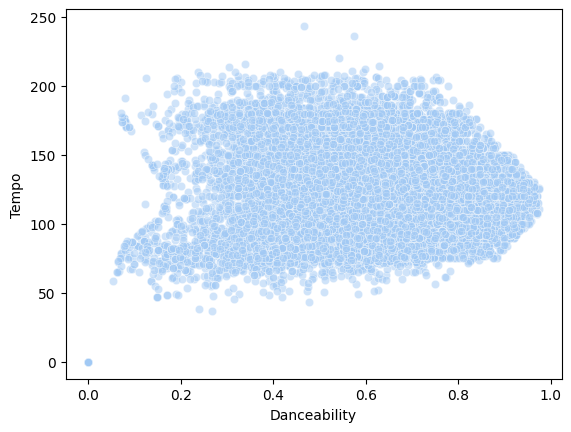

In [29]:
sns.scatterplot(data=df_spotify_youtube_num,x='Danceability',y='Tempo',alpha=0.5)

#### Instrumentalness e Loudness

<Axes: xlabel='Instrumentalness', ylabel='Loudness'>

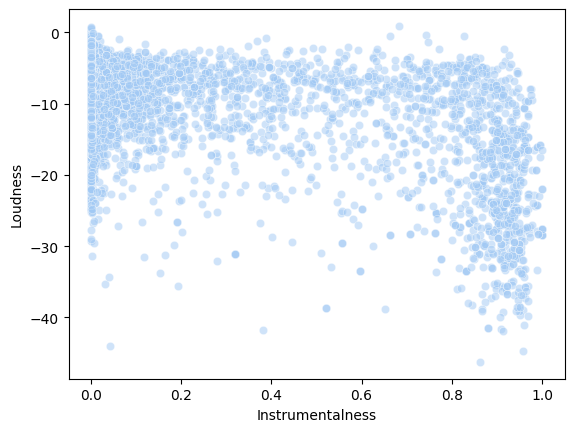

In [30]:
sns.scatterplot(data=df_spotify_youtube_num,x='Instrumentalness',y='Loudness',alpha=0.5)

### Matriz Correlação

Construindo a matriz correlação das colunas pertencentes ao DataFrame "df_spotify_youtube_num"

#### Danceability, Energy, Key, Loudness, Speechiness

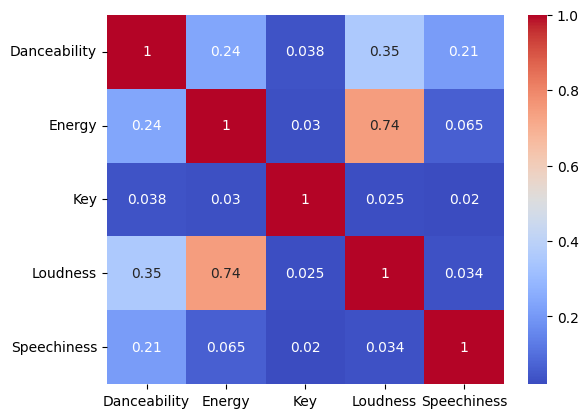

In [31]:
correlacao_matriz_a = df_spotify_youtube_num[['Danceability','Energy','Key','Loudness','Speechiness']].corr()
sns.heatmap(correlacao_matriz_a, annot=True,cmap='coolwarm')
plt.show()

#### Acousticness, Instrumentalness, Liveness, Valence e Tempo

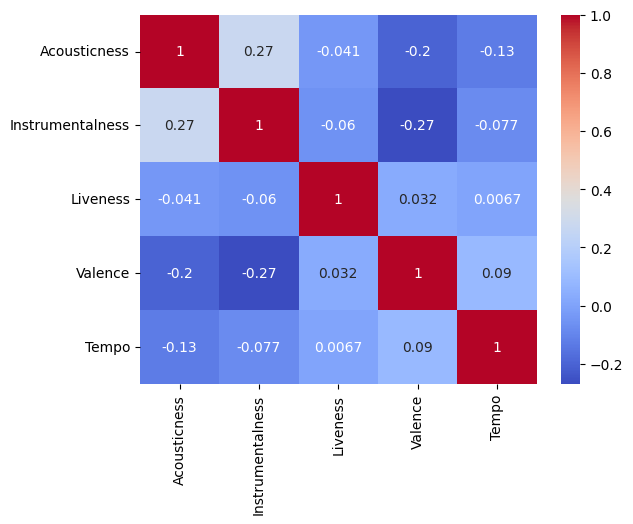

In [32]:
correlacao_matriz = df_spotify_youtube_num[['Acousticness','Instrumentalness','Liveness','Valence','Tempo']].corr()
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm')
plt.show()

#### Duration_ms, Views, Likes, Comments e Stream

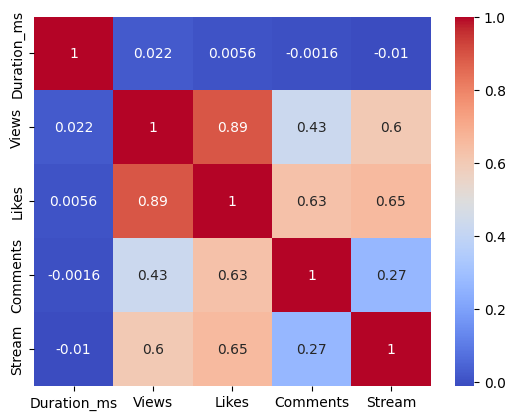

In [33]:
correlacao_matriz = df_spotify_youtube_num[['Duration_ms','Views','Likes','Comments','Stream']].corr()
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm')
plt.show()

### Agrupamentos

#### Loudness e Energy

Preenchendo os valores nulos do data frame "df_loud_energy" com a média dos valores de suas respectivas colunas

In [5]:
df_loud_energy = df_spotify_youtube[['Loudness','Energy']]
df_loud_energy = df_loud_energy.fillna(df_loud_energy.mean())

Implementando um laço de repetição para descobrir o valor adequado de clusters, através da análise do gráfico, a fim de realizar o agrupamento dos dados

<Axes: >

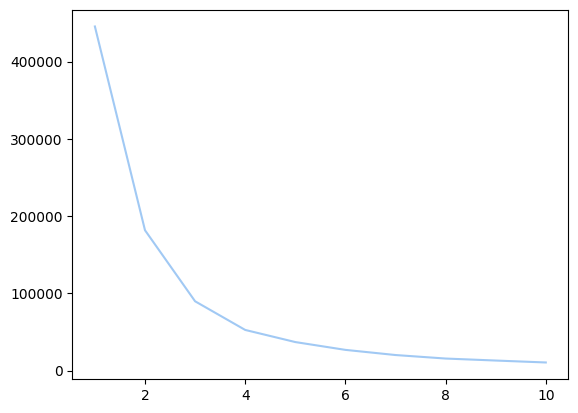

In [35]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_loud_energy)
    inertias.append(kmeans.inertia_)

sns.lineplot(x=range(1,11), y=inertias)

Realizando o agrupamento dos dados das colunas 'Loudness' e 'Energy' com 2 e 4 clusters, respectivamente

<Axes: xlabel='Loudness', ylabel='Energy'>

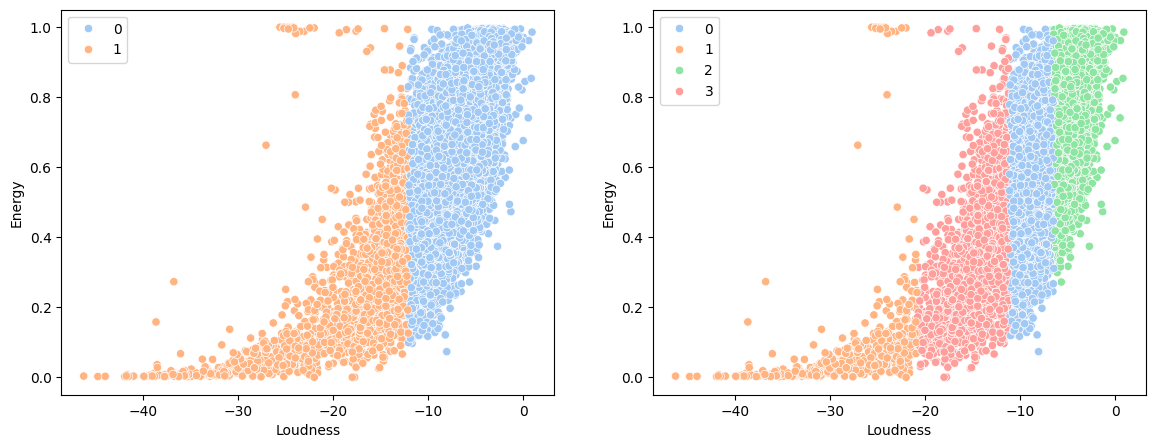

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_loud_energy)
sns.scatterplot(data=df_loud_energy, x='Loudness', y='Energy', hue=kmeans.labels_, palette='pastel')
plt.subplot(1,2,2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_loud_energy)
sns.scatterplot(data=df_loud_energy, x='Loudness', y='Energy', hue=kmeans.labels_, palette='pastel')

Realizando o agrupamento dos dados das colunas 'Loudness' e 'Energy' com 3 clusters, o qual será utilizado para a análise dos dados

<Axes: xlabel='Loudness', ylabel='Energy'>

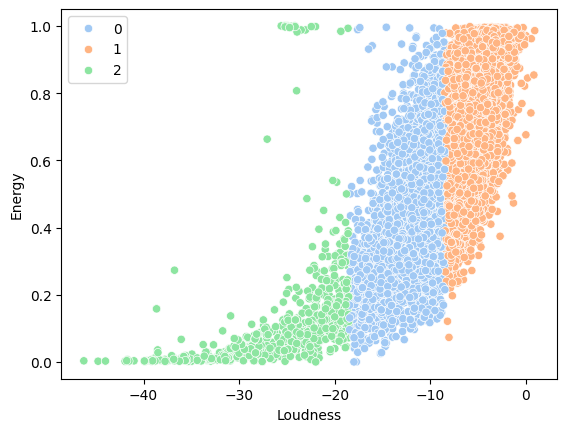

In [68]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_loud_energy)
sns.scatterplot(data=df_loud_energy, x='Loudness', y='Energy', hue=kmeans.labels_, palette='pastel')

Exibindo os dados pertencentes ao Grupo 0 - Azul

In [84]:
df_label_0 = df_spotify_youtube.loc[kmeans.labels_ == 0]
df_label_0

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
11,11,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Under the Bridge,Blood Sugar Sex Magik (Deluxe Edition),album,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,0.559,0.345,4.0,...,https://www.youtube.com/watch?v=GLvohMXgcBo,Red Hot Chili Peppers - Under The Bridge [Offi...,Red Hot Chili Peppers,2.466877e+08,1213572.0,32761.0,Watch the official music video for Under The B...,True,True,1.061751e+09
18,18,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Give It Away,Blood Sugar Sex Magik (Deluxe Edition),album,spotify:track:0uppYCG86ajpV2hSR3dJJ0,0.666,0.936,7.0,...,https://www.youtube.com/watch?v=Mr_uHJPUlO8,Red Hot Chili Peppers - Give It Away [Official...,Red Hot Chili Peppers,8.663793e+07,434837.0,16029.0,Watch the official music video for Give It Awa...,True,True,3.019472e+08
31,31,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Nothing Else Matters (Remastered),Metallica (Remastered),album,spotify:track:2CtemffYhT0DJWcT1XW047,0.547,0.394,4.0,...,https://www.youtube.com/watch?v=tAGnKpE4NCI,Metallica: Nothing Else Matters (Official Musi...,Metallica,1.209806e+09,5127599.0,135946.0,Metallica's official music video for “Nothing ...,True,True,NaN
32,32,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Master of Puppets (Remastered),Master of Puppets (Remastered Deluxe Box Set),album,spotify:track:54bm2e3tk8cliUz3VSdCPZ,0.539,0.828,4.0,...,https://www.youtube.com/watch?v=E0ozmU9cJDg,Master of Puppets (Remastered),Metallica - Topic,2.076291e+07,293409.0,1703.0,Provided to YouTube by Blackened Recordings\r\...,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20680,20680,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,Si Yo Fuera Ladrón,Si Yo Fuera Ladrón,single,spotify:track:17PlPQ6pWfjvA77V0UHfhV,0.632,0.533,7.0,...,https://www.youtube.com/watch?v=wHYQP8s3a-g,Grupo Frontera ft. Prófugos De Nuevo León - Si...,Grupo Frontera,7.613930e+06,48652.0,264.0,Grupo Frontera ft. Prófugos De Nuevo León - Si...,True,True,9.141483e+06
20681,20681,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,La Pareja Ideal - En Vivo,"En Vivo, Vol.1",single,spotify:track:2gpgzhumYabZNyrsyvdAat,0.619,0.426,9.0,...,https://www.youtube.com/watch?v=gjkXX34Tjxk,Grupo Frontera ft. Los Dorados - La Pareja Ide...,Grupo Frontera,1.000542e+07,66885.0,546.0,Grupo Frontera ft. Los Dorados - La Pareja Ide...,True,True,6.787437e+06
20685,20685,Jung Kook,https://open.spotify.com/artist/6HaGTQPmzraVma...,Left and Right (Feat. Jung Kook of BTS) - Acap...,Left and Right (Feat. Jung Kook of BTS),single,spotify:track:0lWsA6TPYDRWenhCJrbfYu,0.571,0.169,9.0,...,https://www.youtube.com/watch?v=a7GITgqwDVg,Charlie Puth - Left And Right (feat. Jung Kook...,Charlie Puth,2.933680e+08,8016899.0,540887.0,Charlie Puth - Left And Right (feat. Jung Kook...,True,True,NaN
20705,20705,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,ONLY NEED MY BABY! (SMOAGT),ONLY NEED MY BABY! (SMOAGT),single,spotify:track:2lIPicEikuMfrsD5cP3Xyp,0.704,0.444,8.0,...,https://www.youtube.com/watch?v=DQrSfZh2R-s,ONLY NEED MY BABY! (SMOAGT) [Prod. Eem Triplin],ThxSoMch,3.363600e+04,1282.0,20.0,NaN,True,True,NaN


Exibindo os dados pertencentes ao Grupo 1 - Laranja

In [89]:
df_label_1 = df_spotify_youtube.loc[kmeans.labels_ == 1]
df_label_1

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,4.346636e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,3.238503e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\r\n\r\nJUST D...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\r\n\r\nSET FI...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\r\n\r\nOUTSID...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\r\n\r\nONLY G...,True,True,6.873961e+06


Exibindo os dados pertencentes ao Grupo 2 - Verde

In [86]:
df_label_2 = df_spotify_youtube.loc[kmeans.labels_ == 2]
df_label_2

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
264,264,Fleetwood Mac,https://open.spotify.com/artist/08GQAI4eElDnRO...,Landslide,Fleetwood Mac,album,spotify:track:5ihS6UUlyQAfmp48eSkxuQ,0.414,0.16100,7.0,...,https://www.youtube.com/watch?v=WM7-PYtXtJM,Fleetwood Mac - Landslide (Official Music Vide...,Fleetwood Mac,76081765.0,451100.0,24275.0,You're watching the official music video remas...,True,True,512338633.0
530,530,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Nuvole Bianche,Una Mattina,album,spotify:track:3weNRklVDqb4Rr5MhKBR3D,0.191,0.05820,8.0,...,https://www.youtube.com/watch?v=O-HsW142T5g,Ludovico Einaudi - Nuvole Bianche (Official Mu...,LudovicoEinaudiVEVO,12422512.0,114821.0,4830.0,New for 2013. In A Time lapse. Order now on iT...,True,True,312614767.0
531,531,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Una Mattina,Una Mattina,album,spotify:track:0Dkibk70FDp6t7eOZNemNQ,0.231,0.02970,2.0,...,https://www.youtube.com/watch?v=j1Ck42-_btY,Ludovico Einaudi - Una Mattina,Beatriz,18827869.0,185950.0,3358.0,Ludovico Einaudi - Una Mattina,False,False,177586576.0
532,532,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,The Tree,Moments of Peace,album,spotify:track:4hQeiQovsUpgox09PPXw91,0.316,0.00329,5.0,...,https://www.youtube.com/watch?v=_xfJctxJ1N8,Ludovico Einaudi - The Tree,LudovicoEinaudiVEVO,241537.0,5145.0,235.0,Music video by Ludovico Einaudi performing The...,True,True,3368451.0
533,533,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Wind Song,Underwater,album,spotify:track:48i1p3R9l9f7zjcHPJysZZ,0.339,0.00572,11.0,...,https://www.youtube.com/watch?v=0RV_hthKxEE,Ludovico Einaudi - Wind Song (Performance Video),LudovicoEinaudiVEVO,703698.0,18068.0,389.0,"""Underwater is a sound from another place""\r\n...",True,True,16169290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20651,20651,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Colicky Baby Relaxing Tunes,White Noise Calming Piano Melodies,album,spotify:track:3O8dE6sHIolNoyaOyru4KT,0.197,0.98200,0.0,...,https://www.youtube.com/watch?v=oewj_XEM1js,Colicky Baby Sleeps To This Magic Sound | Whit...,Relaxing White Noise,191813239.0,428675.0,0.0,If your baby won't stop crying and nothing see...,True,True,2045480.0
20652,20652,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Gentle Piano Melodies,White Noise Calming Piano Melodies,album,spotify:track:1Hs4Wz0C8wf6BbHod1ujfP,0.437,1.00000,2.0,...,https://www.youtube.com/watch?v=OBBE-mlojO8,Gentle White Noise Piano Melodies,Sleepy Penguin - Topic,22635.0,26.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nG...,True,True,2021885.0
20653,20653,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Soothing Baby White Nosie,White Noise Calming Piano Melodies,album,spotify:track:03uw8eP8dT5zUQRO6pKxUT,0.379,0.99800,0.0,...,https://www.youtube.com/watch?v=YU0H88DRnMg,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,35534.0,196.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nW...,True,True,2024411.0
20654,20654,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Soothing Piano and White Nosie,White Noise Calming Piano Melodies,album,spotify:track:6l1pPmieUGAl5pbjvCAjZk,0.236,0.99500,2.0,...,https://www.youtube.com/watch?v=YU0H88DRnMg,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,35534.0,196.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nW...,True,True,1985385.0


#### Análise e Conclusões

A partir da análise dos grupos formados, pode-se concluir que:
- No **Grupo 2 - Verde** percebe-se uma concentração de **músicas clássicas, sinfônicas** e/ou **orquestrais**, em decorrência da baixa amplitude e intensidade dos elementos musicais que as envolvem, além de artistas voltados ao classicismo, como **Frédéric Chopin**, **Franz Schubert**, **Wolfgang Amadeus Mozart** e **London Symphony Orchestra**.

- No **Grupo 0 - Azul** nota-se um conjunto de músicas com instrumentais mais leves e relacionadas aos gêneros **Jazz**, **Soft Rock**, **Country**,**Rock Pop** e **Alternative Rock** que, em sua maioria, pertencem a artistas da década de 40-90, como por exemplo, **Fleetwood Mac**, **The Beatles**, **Frank Sinatra**, **Elthon John**, **Elvis Presley** e **Red Hot Chili Peppers**.

- No **Grupo 1 - Laranja** é possível identificar a presença de músicas com instrumentais e vocais mais pesados, devido ao uso frequente de sintetizadores e samplers, sendo a sua maior parte músicas do gênero **Rip-Hop**, **Rap**, **Heavy Metal**, **Hard Rock**, **Pop** e **Eletrônica**. Alguns artistas presentes que podem ser citados são: **Gorillaz**, **50 cent**, **Black Eyed Pies**, **AC/DC**, **Linkin Park**, **Daft Punk** e **Shakira**.

### Tempo e Danceability

Preenchendo os valores nulos do data frame "df_loud_energy" com a média dos valores de suas respectivas colunas

In [9]:
df_tempo_danceability = df_spotify_youtube[['Tempo', 'Danceability']]
df_tempo_danceability = df_tempo_danceability.fillna(df_tempo_danceability.mean())

Implementando um laço de repetição para descobrir o valor adequado de clusters, através da análise do gráfico, a fim de realizar o agrupamento dos dados

<Axes: >

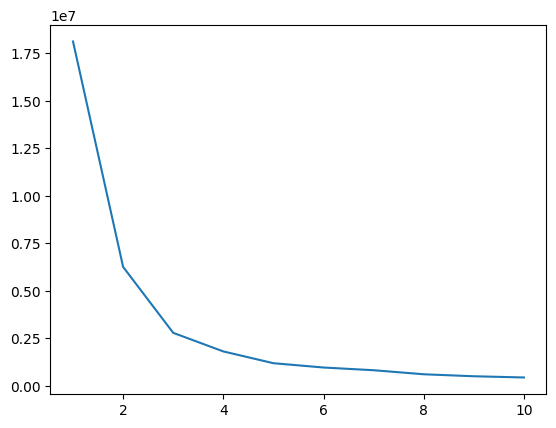

In [50]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_tempo_danceability)
    inertias.append(kmeans.inertia_)

sns.lineplot(x=range(1,11), y=inertias)

Realizando o agrupamento dos dados das colunas 'Tempo' e 'Danceability' com 2 e 4 clusters, respectivamente

<Axes: xlabel='Tempo', ylabel='Danceability'>

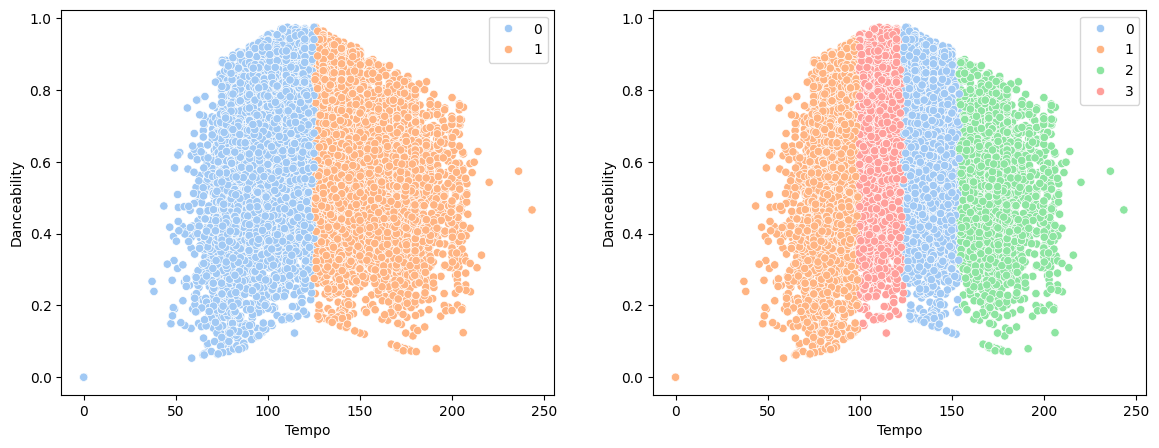

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_tempo_danceability)
sns.scatterplot(data=df_tempo_danceability, x='Tempo', y='Danceability', hue=kmeans.labels_, palette='pastel')
plt.subplot(1,2,2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_tempo_danceability)
sns.scatterplot(data=df_tempo_danceability, x='Tempo', y='Danceability', hue=kmeans.labels_, palette='pastel')

Realizando o agrupamento dos dados das colunas 'Tempo' e 'Danceability' com 3 clusters, o qual será utilizado para a análise dos dados

<Axes: xlabel='Tempo', ylabel='Danceability'>

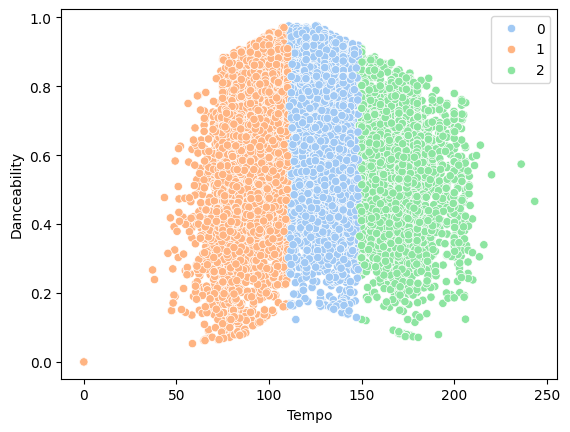

In [78]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_tempo_danceability)
sns.scatterplot(data=df_tempo_danceability, x='Tempo', y='Danceability', hue=kmeans.labels_, palette='pastel')

Exibindo os dados pertencentes ao Grupo 0 - Azul

In [64]:
df_label_0 = df_spotify_youtube.loc[kmeans.labels_ == 0]
df_label_0

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
11,11,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Under the Bridge,Blood Sugar Sex Magik (Deluxe Edition),album,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,0.559,0.345,4.0,...,https://www.youtube.com/watch?v=GLvohMXgcBo,Red Hot Chili Peppers - Under The Bridge [Offi...,Red Hot Chili Peppers,2.466877e+08,1213572.0,32761.0,Watch the official music video for Under The B...,True,True,1.061751e+09
18,18,Red Hot Chili Peppers,https://open.spotify.com/artist/0L8ExT028jH3dd...,Give It Away,Blood Sugar Sex Magik (Deluxe Edition),album,spotify:track:0uppYCG86ajpV2hSR3dJJ0,0.666,0.936,7.0,...,https://www.youtube.com/watch?v=Mr_uHJPUlO8,Red Hot Chili Peppers - Give It Away [Official...,Red Hot Chili Peppers,8.663793e+07,434837.0,16029.0,Watch the official music video for Give It Awa...,True,True,3.019472e+08
31,31,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Nothing Else Matters (Remastered),Metallica (Remastered),album,spotify:track:2CtemffYhT0DJWcT1XW047,0.547,0.394,4.0,...,https://www.youtube.com/watch?v=tAGnKpE4NCI,Metallica: Nothing Else Matters (Official Musi...,Metallica,1.209806e+09,5127599.0,135946.0,Metallica's official music video for “Nothing ...,True,True,NaN
32,32,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,Master of Puppets (Remastered),Master of Puppets (Remastered Deluxe Box Set),album,spotify:track:54bm2e3tk8cliUz3VSdCPZ,0.539,0.828,4.0,...,https://www.youtube.com/watch?v=E0ozmU9cJDg,Master of Puppets (Remastered),Metallica - Topic,2.076291e+07,293409.0,1703.0,Provided to YouTube by Blackened Recordings\r\...,True,True,NaN
34,34,Metallica,https://open.spotify.com/artist/2ye2Wgw4gimLv2...,The Unforgiven (Remastered),Metallica (Remastered),album,spotify:track:7lwvxYumAEo10lzAplRGXM,0.531,0.583,7.0,...,https://www.youtube.com/watch?v=Ckom3gf57Yw,Metallica - The Unforgiven (Official Music Video),Warner Records Vault,4.261257e+08,1781690.0,46392.0,“The Unforgiven” by Metallica from the album M...,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20678,20678,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,La Ladrona - En Vivo,"En Vivo, Vol.1",single,spotify:track:4YKsiPP0QqHsANNaZJwQBT,0.709,0.436,7.0,...,https://www.youtube.com/watch?v=mH_buq-7qs0,Grupo Frontera - La Ladrona (En Vivo),Grupo Frontera,1.955171e+07,126928.0,750.0,"Escucha ""Bebe Dame"" ft. Fuerza Régida: https:/...",True,True,1.459501e+07
20680,20680,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,Si Yo Fuera Ladrón,Si Yo Fuera Ladrón,single,spotify:track:17PlPQ6pWfjvA77V0UHfhV,0.632,0.533,7.0,...,https://www.youtube.com/watch?v=wHYQP8s3a-g,Grupo Frontera ft. Prófugos De Nuevo León - Si...,Grupo Frontera,7.613930e+06,48652.0,264.0,Grupo Frontera ft. Prófugos De Nuevo León - Si...,True,True,9.141483e+06
20681,20681,Grupo Frontera,https://open.spotify.com/artist/6XkjpgcEsYab50...,La Pareja Ideal - En Vivo,"En Vivo, Vol.1",single,spotify:track:2gpgzhumYabZNyrsyvdAat,0.619,0.426,9.0,...,https://www.youtube.com/watch?v=gjkXX34Tjxk,Grupo Frontera ft. Los Dorados - La Pareja Ide...,Grupo Frontera,1.000542e+07,66885.0,546.0,Grupo Frontera ft. Los Dorados - La Pareja Ide...,True,True,6.787437e+06
20705,20705,ThxSoMch,https://open.spotify.com/artist/4MvZhE1iuzttco...,ONLY NEED MY BABY! (SMOAGT),ONLY NEED MY BABY! (SMOAGT),single,spotify:track:2lIPicEikuMfrsD5cP3Xyp,0.704,0.444,8.0,...,https://www.youtube.com/watch?v=DQrSfZh2R-s,ONLY NEED MY BABY! (SMOAGT) [Prod. Eem Triplin],ThxSoMch,3.363600e+04,1282.0,20.0,NaN,True,True,NaN


Exibindo os dados pertencentes ao Grupo 1 - Laranja

In [65]:
df_label_1 = df_spotify_youtube.loc[kmeans.labels_ == 1]
df_label_1

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\r\n\r\nJUST D...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\r\n\r\nSET FI...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\r\n\r\nOUTSID...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\r\n\r\nONLY G...,True,True,6.873961e+06


Exibindo os dados pertencentes ao Grupo 2 - Verde

In [66]:
df_label_2 = df_spotify_youtube.loc[kmeans.labels_ == 2]
df_label_2

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
264,264,Fleetwood Mac,https://open.spotify.com/artist/08GQAI4eElDnRO...,Landslide,Fleetwood Mac,album,spotify:track:5ihS6UUlyQAfmp48eSkxuQ,0.414,0.16100,7.0,...,https://www.youtube.com/watch?v=WM7-PYtXtJM,Fleetwood Mac - Landslide (Official Music Vide...,Fleetwood Mac,76081765.0,451100.0,24275.0,You're watching the official music video remas...,True,True,512338633.0
530,530,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Nuvole Bianche,Una Mattina,album,spotify:track:3weNRklVDqb4Rr5MhKBR3D,0.191,0.05820,8.0,...,https://www.youtube.com/watch?v=O-HsW142T5g,Ludovico Einaudi - Nuvole Bianche (Official Mu...,LudovicoEinaudiVEVO,12422512.0,114821.0,4830.0,New for 2013. In A Time lapse. Order now on iT...,True,True,312614767.0
531,531,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Una Mattina,Una Mattina,album,spotify:track:0Dkibk70FDp6t7eOZNemNQ,0.231,0.02970,2.0,...,https://www.youtube.com/watch?v=j1Ck42-_btY,Ludovico Einaudi - Una Mattina,Beatriz,18827869.0,185950.0,3358.0,Ludovico Einaudi - Una Mattina,False,False,177586576.0
532,532,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,The Tree,Moments of Peace,album,spotify:track:4hQeiQovsUpgox09PPXw91,0.316,0.00329,5.0,...,https://www.youtube.com/watch?v=_xfJctxJ1N8,Ludovico Einaudi - The Tree,LudovicoEinaudiVEVO,241537.0,5145.0,235.0,Music video by Ludovico Einaudi performing The...,True,True,3368451.0
533,533,Ludovico Einaudi,https://open.spotify.com/artist/2uFUBdaVGtyMqc...,Wind Song,Underwater,album,spotify:track:48i1p3R9l9f7zjcHPJysZZ,0.339,0.00572,11.0,...,https://www.youtube.com/watch?v=0RV_hthKxEE,Ludovico Einaudi - Wind Song (Performance Video),LudovicoEinaudiVEVO,703698.0,18068.0,389.0,"""Underwater is a sound from another place""\r\n...",True,True,16169290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20651,20651,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Colicky Baby Relaxing Tunes,White Noise Calming Piano Melodies,album,spotify:track:3O8dE6sHIolNoyaOyru4KT,0.197,0.98200,0.0,...,https://www.youtube.com/watch?v=oewj_XEM1js,Colicky Baby Sleeps To This Magic Sound | Whit...,Relaxing White Noise,191813239.0,428675.0,0.0,If your baby won't stop crying and nothing see...,True,True,2045480.0
20652,20652,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Gentle Piano Melodies,White Noise Calming Piano Melodies,album,spotify:track:1Hs4Wz0C8wf6BbHod1ujfP,0.437,1.00000,2.0,...,https://www.youtube.com/watch?v=OBBE-mlojO8,Gentle White Noise Piano Melodies,Sleepy Penguin - Topic,22635.0,26.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nG...,True,True,2021885.0
20653,20653,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Soothing Baby White Nosie,White Noise Calming Piano Melodies,album,spotify:track:03uw8eP8dT5zUQRO6pKxUT,0.379,0.99800,0.0,...,https://www.youtube.com/watch?v=YU0H88DRnMg,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,35534.0,196.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nW...,True,True,2024411.0
20654,20654,Sleepy Penguin,https://open.spotify.com/artist/32Rb6mS5HQKCu8...,Soothing Piano and White Nosie,White Noise Calming Piano Melodies,album,spotify:track:6l1pPmieUGAl5pbjvCAjZk,0.236,0.99500,2.0,...,https://www.youtube.com/watch?v=YU0H88DRnMg,White Noise Baby Sleep Melody,Sleepy Penguin - Topic,35534.0,196.0,0.0,Provided to YouTube by Revelator Ltd.\r\n\r\nW...,True,True,1985385.0


### Análise e conclusões: 

A partir da análise dos grupos representados no gráfico, conclue-se que: 
- No **Grupo 0 - Azul** Compreende-se musicas que apresentam um **tempo médio**, abordando
gêneros como o pop, dance e hip-hip, metallica, uma **mix entre músicas animadas e suaves**. 
Como por exemplo: **Red Hot Chili Peppers - Give It Away**, **Metallica - Nothing Else Matters** 
e **Grupo Frontera - La Ladrona.**  

- No **Grupo 1 - Laranja** Constata-se musicas que possuem um **tempo que tende a ser rápido e mais energético**
 como **Feel Good** e **Rhinestone Eyes** do **Gorillaz** e **remix eletrônicas** sendo alguma delas
   **Set Fire To The Rain Hardstyle** e **Sick legend Hardstyle - Only Girl Hardstyle.**

- No **Grupo 2 - Verde** Observa-se melodias que possuem um **rítimo mais lento** associado à **danças mais tranquilas e 
românticas** como o tango, ballet clássico, jazz e permite expressar emoções através da dança por músicas como: 
**Landslide - Fleetwood Mac** e **Ludovico Einaudi - Wind Song.**


### Views e Comments 

Preenchendo os valores nulos do data frame "df_views_comments" com a média dos valores de suas respectivas colunas

In [10]:
df_spotify_youtube = pd.read_csv("../Projeto_ICD-Analise_de_Dados_do_Spotify_e_Youtube/Spotify_Youtube.csv")
df_views_comments = df_spotify_youtube[['Views','Comments']]
df_views_comments = df_views_comments.fillna(df_views_comments.mean())

Implementando um laço de repetição para descobrir o valor adequado de clusters, através da análise do gráfico, a fim de realizar o agrupamento dos dados

<Axes: >

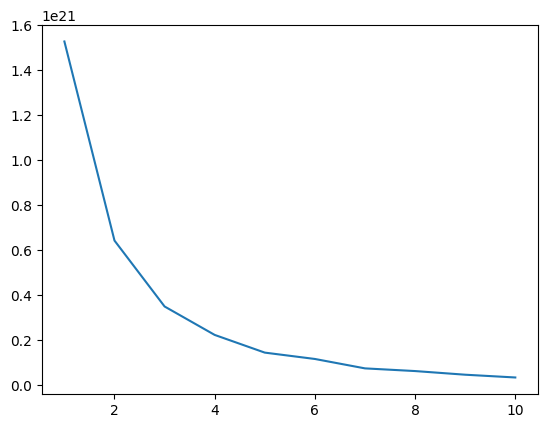

In [5]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_views_comments)
    inertias.append(kmeans.inertia_)

sns.lineplot(x=range(1,11), y=inertias)

Realizando o agrupamento dos dados das colunas 'Views' e 'Comments' com 2 e 4 clusters, respectivamente

<Axes: xlabel='Views', ylabel='Comments'>

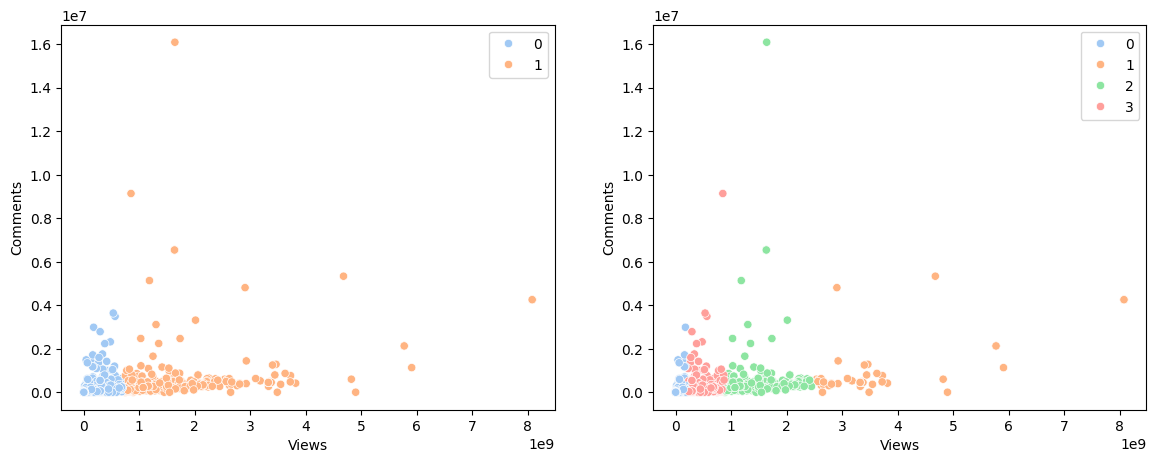

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_views_comments)
sns.scatterplot(data=df_views_comments, x='Views', y='Comments', hue=kmeans.labels_, palette='pastel')
plt.subplot(1,2,2)
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_views_comments)
sns.scatterplot(data=df_views_comments, x='Views', y='Comments', hue=kmeans.labels_, palette='pastel')

Realizando o agrupamento dos dados das colunas 'Views' e 'Comments' com 3 clusters, o qual será utilizado para a análise dos dados

<Axes: xlabel='Views', ylabel='Comments'>

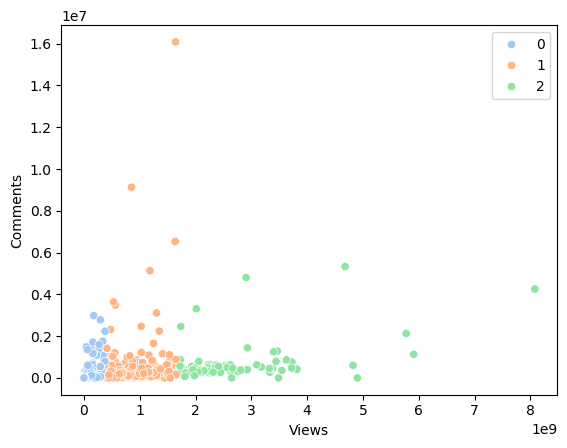

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_views_comments)
sns.scatterplot(data=df_views_comments, x='Views', y='Comments', hue=kmeans.labels_, palette='pastel')

 Exibindo Dados do Grupo 0:


In [7]:
df_label_0 = df_spotify_youtube.loc[kmeans.labels_ == 0]
df_label_0_m= df_label_0.drop(['Energy','Key','Loudness','Speechiness','Url_spotify','Album_type','Uri'],axis=1)
df_label_0_m 

,Unnamed: 0,Artist,Track,Album,Danceability,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,0.676,0.086900,0.000687,0.0463,0.8520,92.761,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,310083733.0
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),0.695,0.042500,0.046900,0.1160,0.5510,108.014,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,0.689,0.000015,0.509000,0.0640,0.5780,120.423,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,434663559.0
5,5,Gorillaz,DARE,Demon Days,0.760,0.022900,0.086900,0.2980,0.9660,120.264,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\r\nhttp://gorillaz.com...,True,True,323850327.0
6,6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,0.716,0.012000,0.262000,0.3250,0.3580,127.030,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,10666154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.582,0.448000,0.000000,0.0839,0.6580,90.002,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\r\n\r\nJUST D...,True,True,9227144.0
20714,20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,0.531,0.028000,0.000000,0.0923,0.6570,174.869,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\r\n\r\nSET FI...,True,True,10898176.0
20715,20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,0.443,0.024300,0.000000,0.1540,0.4190,168.388,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\r\n\r\nOUTSID...,True,True,6226110.0
20716,20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,0.417,0.356000,0.018400,0.1080,0.5390,155.378,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\r\n\r\nONLY G...,True,True,6873961.0


Exibindo Dados do Grupo 1:

In [8]:
df_label_1 = df_spotify_youtube.loc[kmeans.labels_ == 1]
df_label_1_m= df_label_1.drop(['Energy','Key','Loudness','Speechiness','Url_spotify','Album_type','Uri'],axis=1)
df_label_1_m 

,Unnamed: 0,Artist,Track,Album,Danceability,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,0.818,0.00836,0.002330,0.6130,0.772,138.559,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
4,4,Gorillaz,Clint Eastwood,Gorillaz,0.663,0.02530,0.000000,0.0698,0.525,167.953,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
10,10,Red Hot Chili Peppers,Californication,Californication (Deluxe Edition),0.592,0.00210,0.001650,0.1270,0.328,96.483,...,https://www.youtube.com/watch?v=YlUKcNNmywk,Red Hot Chili Peppers - Californication (Offic...,Red Hot Chili Peppers,1.018811e+09,4394471.0,121452.0,Watch the official music video for Californica...,True,True,1.055738e+09
13,13,Red Hot Chili Peppers,Scar Tissue,Californication (Deluxe Edition),0.595,0.07790,0.002740,0.1080,0.547,88.969,...,https://www.youtube.com/watch?v=mzJj5-lubeM,Red Hot Chili Peppers - Scar Tissue [Official ...,Red Hot Chili Peppers,4.351215e+08,1890900.0,37069.0,Watch the official music video for Scar Tissue...,True,True,6.138387e+08
14,14,Red Hot Chili Peppers,Otherside,Californication (Deluxe Edition),0.458,0.00316,0.000202,0.0756,0.513,123.229,...,https://www.youtube.com/watch?v=rn_YodiJO6k,Red Hot Chili Peppers - Otherside [Official Mu...,Red Hot Chili Peppers,6.735287e+08,3140356.0,60091.0,Watch the official music video for Otherside b...,True,True,7.327745e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20309,20309,CoComelon,Old MacDonald,"CoComelon Kids Hits, Vol. 1",0.704,0.29200,0.000001,0.0419,0.936,199.841,...,https://www.youtube.com/watch?v=Wm4R8d0d8kU,Old MacDonald | CoComelon Nursery Rhymes & Kid...,Cocomelon - Nursery Rhymes,1.545924e+09,5397846.0,0.0,Baby is visiting his grandpa on the farm and h...,True,True,2.793820e+07
20310,20310,CoComelon,Finger Family,"CoComelon Kids Hits, Vol. 2",0.816,0.35200,0.000014,0.0768,0.965,119.983,...,https://www.youtube.com/watch?v=hqr46XZhtRg,Finger Family + More Nursery Rhymes & Kids Son...,Cocomelon - Nursery Rhymes,5.160842e+08,1714627.0,0.0,"A new compilation video, including one of our ...",True,True,2.684379e+07
20312,20312,CoComelon,Head Shoulder Knees and Toes,CoComelon Essentials,0.516,0.70900,0.000086,0.1160,0.796,159.757,...,https://www.youtube.com/watch?v=QA48wTGbU7A,Head Shoulders Knees & Toes | CoComelon Nurser...,Cocomelon - Nursery Rhymes,4.489368e+08,1545455.0,0.0,"Dance along with this classic nursery rhyme, a...",True,True,3.234292e+07
20313,20313,Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",0.621,0.01250,0.033000,0.2300,0.550,128.033,...,https://www.youtube.com/watch?v=A_g3lMcWVy0,QUEVEDO || BZRP Music Sessions #52,Bizarrap,4.456615e+08,5202210.0,146199.0,QUEVEDO || BZRP Music Sessions #52\r\n\r\nLyri...,True,True,9.914611e+08


Exibindo dados do Grupo 2:

In [9]:
df_label_2 = df_spotify_youtube.loc[kmeans.labels_ == 2]
df_label_2_m= df_label_2.drop(['Energy','Key','Loudness','Speechiness','Url_spotify','Album_type','Uri'],axis=1)
df_label_2_m 

,Unnamed: 0,Artist,Track,Album,Danceability,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
20,20,50 Cent,In Da Club,Get Rich Or Die Tryin',0.902,0.2600,0.000000,0.0749,0.8050,90.059,...,https://www.youtube.com/watch?v=5qm8PH4xAss,50 Cent - In Da Club (Official Music Video),50CentVEVO,1.682616e+09,10481678.0,296745.0,CELEBRATING ONE BILLION VIEWS!!\r\nREMASTERED ...,True,True,1.041737e+09
43,43,Coldplay,Something Just Like This,Memories...Do Not Open,0.617,0.0498,0.000014,0.1640,0.4460,103.019,...,https://www.youtube.com/watch?v=FM7MFYoylVs,The Chainsmokers & Coldplay - Something Just L...,ChainsmokersVEVO,2.118019e+09,10282499.0,270444.0,Official lyric video for ”Something Just Like ...,True,True,2.030826e+09
47,47,Coldplay,Hymn for the Weekend,A Head Full of Dreams,0.491,0.2110,0.000007,0.3250,0.4120,90.027,...,https://www.youtube.com/watch?v=YykjpeuMNEk,Coldplay - Hymn For The Weekend (Official Video),Coldplay,1.828242e+09,13515772.0,377666.0,Coldplay - Hymn For The Weekend is taken from ...,True,True,1.049655e+09
61,61,Linkin Park,Numb,Meteora,0.496,0.0046,0.000000,0.6390,0.2430,110.018,...,https://www.youtube.com/watch?v=kXYiU_JCYtU,Numb [Official Music Video] - Linkin Park,Linkin Park,1.928734e+09,12341722.0,550921.0,Watch the official music video for Numb by Lin...,True,True,1.195213e+09
126,126,Eminem,Love The Way You Lie,Recovery,0.749,0.2410,0.000000,0.5200,0.6410,86.989,...,https://www.youtube.com/watch?v=uelHwf8o7_U,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,2.539157e+09,12696568.0,599124.0,Music video by Eminem performing Love The Way ...,True,True,1.115479e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18778,18778,ZAYN,Dusk Till Dawn (feat. Sia) - Radio Edit,Icarus Falls,0.259,0.1020,0.000001,0.1060,0.0951,180.042,...,https://www.youtube.com/watch?v=tt2k8PGm-TI,ZAYN - Dusk Till Dawn (Official Video) ft. Sia,ZaynVEVO,1.953780e+09,14149792.0,396636.0,"ZAYN's ""Dusk Till Dawn"" ft. Sia on iTunes: htt...",True,True,1.378235e+09
19230,19230,Jhayco,No Me Conoce - Remix,Famouz,0.804,0.1400,0.000000,0.0927,0.5620,91.974,...,https://www.youtube.com/watch?v=w2C6RhQBYlg,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",JhayCortezVEVO,1.979060e+09,5920550.0,107535.0,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",True,True,1.067736e+09
20303,20303,CoComelon,Wheels on the Bus,"CoComelon Kids Hits, Vol. 1",0.941,0.1840,0.000029,0.1570,0.9650,125.021,...,https://www.youtube.com/watch?v=e_04ZrNroTo,Wheels on the Bus | CoComelon Nursery Rhymes &...,Cocomelon - Nursery Rhymes,4.898831e+09,14396841.0,0.0,Bounce along in the bus all over town with thi...,True,True,8.343436e+07
20304,20304,CoComelon,Baa Baa Black Sheep,"CoComelon Kids Hits, Vol. 1",0.711,0.8290,0.000030,0.1190,0.9690,199.955,...,https://www.youtube.com/watch?v=MR5XSOdjKMA,Baa Baa Black Sheep | CoComelon Nursery Rhymes...,Cocomelon - Nursery Rhymes,3.486504e+09,8943443.0,0.0,It’s bath time for the sheep! But we’ll have ...,True,True,4.655435e+07


### Análise e Conclusão:

A partir da análise dos grupos representados no gráfico, conclue-se que: 

- No **Grupo 0-Azul** - Esse grupo tem menos visualizações e comentários,e os dados são menos dispersos.

- No **Grupo 1-Laranja** - Contém músicas bem variadas como músicas da banda **"Gorilazz"**, a banda **"Red Hot Chili Peppers"** e algumas músicas do **"Cocomelon-Nursey Rhymes"**, a quantidade de visualizações e comentários são bem variadas e não são interligadas entre si.

- No **Grupo 2-Verde** - O grupo com mais visualizações, é composto na sua maior parte com músicas atemporais que foram um sucesso na época de lançamento e são  relembradas até a atualidade.Com artistas reconhecidos como **Eminem**, **50 cent**, **Zain Malik**, **Beyonce**, **Coldplay** e feats fantásticos como a banda Coldplay e a Beyonce, o Zain Malik e a Sia. Singles históricos como **"In da Club"** do 50 cent esse foi seu primeiro single a atingir o número um na Billboard Hot 100 dos EUA. Neste mesmo grupo há um contraste com as músicas infantis um dos exemplos é os **"Cocomelon-Nursery Rhymes"** que tem um grande número de visualização. O que diferenciam os itens do dataframe é que as músicas infantis não tem comentários.
